# 

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
Mean Squared Error: 1.2923
Root Mean Squared Error: 1.1368
R² Score: 0.0138


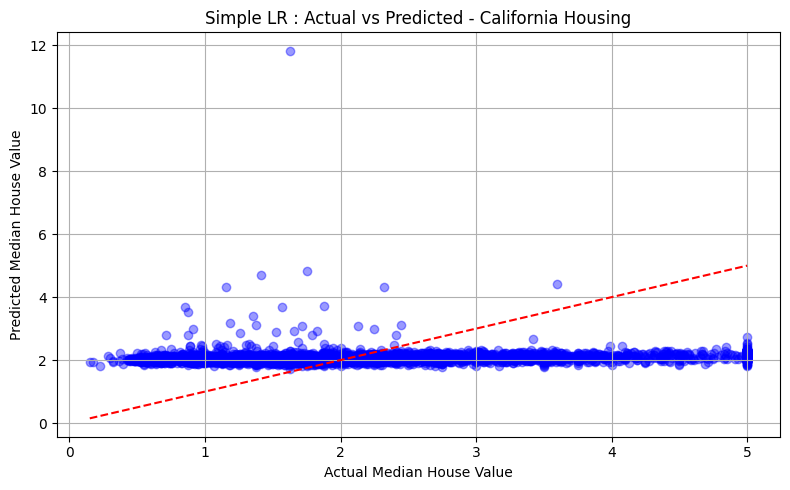

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# ---------------- Load Dataset ----------------
california = fetch_california_housing(as_frame=True)
df = california.frame
print(df.head())
# Features and target
X = df[['AveRooms']]  # all columns except target
y = df['MedHouseVal']  # target: median house value

# ---------------- Preprocessing ----------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------------- Train/Test Split ----------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# ---------------- Linear Regression ----------------
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# ---------------- Evaluation ----------------
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# ---------------- Visualization ----------------
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.4, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Simple LR : Actual vs Predicted - California Housing")
plt.grid(True)
plt.tight_layout()
plt.show()


=== Multiple Linear Regression Results ===
Mean Squared Error: 0.5559
Root Mean Squared Error: 0.7456
R² Score: 0.5758


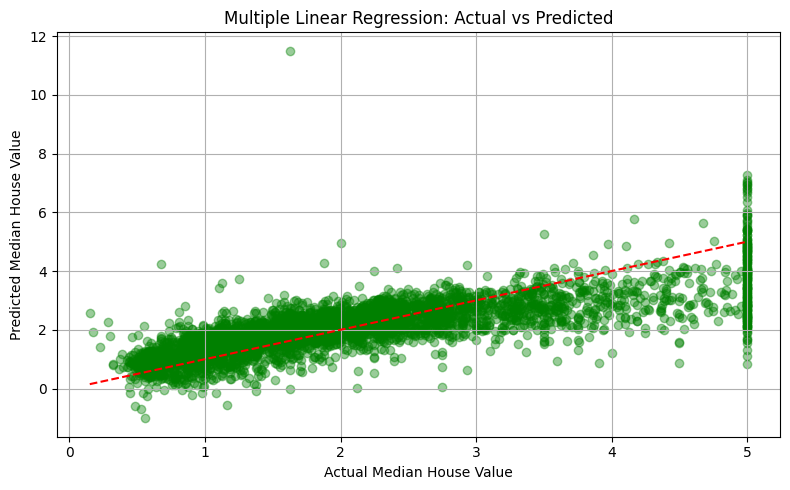

In [3]:


# ---------------- Load California Housing Dataset ----------------
california = fetch_california_housing(as_frame=True)
df = california.frame

# ---------------- Features & Target ----------------
X = df.drop(columns=['MedHouseVal'])  # Use all features
y = df['MedHouseVal']                 # Target: Median house value

# ---------------- Standardize Features ----------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------------- Train-Test Split ----------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# ---------------- Multiple Linear Regression ----------------
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

# ---------------- Predict ----------------
y_pred_multi = multi_model.predict(X_test)

# ---------------- Evaluation ----------------
mse = mean_squared_error(y_test, y_pred_multi)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_multi)

print("=== Multiple Linear Regression Results ===")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# ---------------- Visualization ----------------
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_multi, alpha=0.4, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Multiple Linear Regression: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()
